Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch: 93
Epoch: 94
Epoch: 95
Epoch: 96
Epoch: 97
Epoch: 98
Epoch: 99


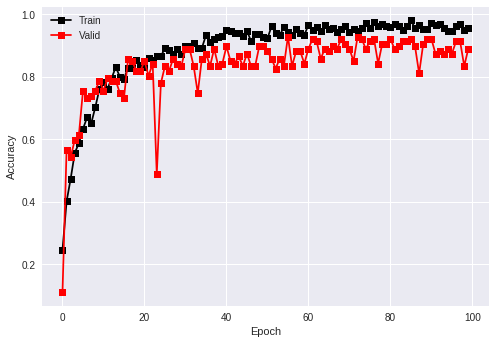

Final test accuracy 88.9763779527559


In [8]:
import numpy as np
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

X_train_final = []
X_test_final = []
train_accuracy = []
test_accuracy = []

batch_Size = 30
number_of_epochs = 100 

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
  
        self.conv1 = nn.Conv2d(1, 32, 5, padding=0) 
        self.conv2 = nn.Conv2d(32, 64, 5, padding=0)        
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=0)
        self.drop1 = nn.Dropout2d(p=0.3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 9 * 9, 2048)
        self.drop2 = nn.Dropout2d(p=0.5)
        self.fc2 = nn.Linear(2048, 1024)
        self.drop3 = nn.Dropout2d(p=0.5)
        self.fc3 = nn.Linear(1024, 8)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm1d(2048)
        self.bn5 = nn.BatchNorm1d(1024)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.bn3(x)
        x = self.drop1(x)
        x = self.pool2(x)
        x = x.view(-1, 128 * 9 * 9)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.bn4(x)
        x = self.drop2(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.bn5(x)
        x = self.drop3(x)
        x = self.fc3(x)
        return x
    
def weight(labels):
    scale = torch.FloatTensor(8)
    for i in range(8):
        scale[i] = ((labels==i).sum())
    return scale.max() / scale
  
class custom_dataset(torch.utils.data.dataset.Dataset):
    def __init__(self, data, labels, transforms=None):
        self.data = data
        self.labels = labels
        self.transforms = transforms

    def __getitem__(self, index):   
        dat = self.data[index]
        if self.transforms is not None:
            dat = self.transforms(dat)
        return (dat,self.labels[index])
   
    def __len__(self):
        return len(self.data)

transform_train = transforms.Compose([transforms.ToPILImage(), transforms.Resize(48), transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform_test = transforms.Compose([transforms.ToPILImage(), transforms.Resize(48), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

images_train = np.load(r'train_images.npy', encoding='latin1')
train_labels = np.load(r'train_labels.npy', encoding='latin1')

images_test = np.load(r'test_images.npy', encoding='latin1')
test_labels = np.load(r'test_labels.npy', encoding='latin1')


for i in range(0, len(images_train)):
    X_train_final.append(torch.Tensor(images_train[i].reshape((1, 350, 350)))/255)
for i in range(0, len(images_test)):
    X_test_final.append(torch.Tensor(images_test[i].reshape((1, 350, 350)))/255)
    
X_train_label = torch.LongTensor(train_labels)
X_test_label = torch.LongTensor(test_labels)

trainset = custom_dataset(X_train_final,X_train_label, transforms=transform_train)
testset = custom_dataset(X_test_final, X_test_label, transforms=transform_test)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_Size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_Size, shuffle=False, num_workers=0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.015, momentum=0.9)

for epoch in range(number_of_epochs):  
    correct = 0.
    total = 0.
    
    if epoch> 10:
      optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.015, momentum=0.9)
    elif epoch > 50:
      optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.00015, momentum=0.9)
    
    model.train()
    running_loss_train = 0.0
    running_loss_test = 0.0
    for i, data in enumerate(train_loader, 0):
        
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
    train_accuracy.append(correct / total)
    
    correct = 0.
    total = 0.
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()
            loss = criterion(outputs, labels.to(device))
    test_accuracy.append(correct/total)

    print('Epoch:', epoch)
    #print('Train accuracy:', train_accuracy[epoch]*100)
    #print('Validation accuracy:', test_accuracy[epoch]*100)  

###################################################
plt.figure()
plt.plot(range(number_of_epochs),train_accuracy, 'sk-', label='Train')
plt.plot(range(number_of_epochs),test_accuracy, 'sr-', label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
torch.cuda.empty_cache()
plt.show()
###################
correct = 0.
total = 0.
model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
        loss = criterion(outputs, labels.to(device))

print("Final test accuracy", (correct/total)*100)


In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57400000 @  0x7fb5a7fb32a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x585ea000 @  0x7f36a57902a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x58650000 @  0x7f33485c92a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x587dc000 @  0x7fc6a8ce32a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch